# Tabular Model: flat data, without context

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mostly-ai/mostlyai-engine/blob/main/examples/flat.ipynb)

In [106]:
from pathlib import Path
import numpy as np
import pandas as pd
from mostlyai import engine

# init workspace and logging
ws = Path("ws-initonly-airbnbF")
engine.init_logging()

# load original data
# url = "https://github.com/mostly-ai/public-demo-data/raw/refs/heads/dev/census"
# trn_df = pd.read_csv(f"{url}/census.csv.gz")
trn_df = pd.read_csv("~/Downloads/airbnb.csv.gz")
trn_df["latitude"] = trn_df["latitude"] - trn_df["latitude"].mean()
trn_df["longitude"] = trn_df["longitude"] - trn_df["longitude"].mean()
trn_df["LAT_LONG"] = trn_df["latitude"].astype(str) + ", " + trn_df["longitude"].astype(str)
# trn_df = trn_df.drop(columns=["latitude", "longitude"])
# trn_df = trn_df[["neighbourhood_group", "neighbourhood", "LAT_LONG"]].head(500)
trn_df = trn_df.head(500)
trn_df.loc[:200, "LAT_LONG"] = np.nan
trn_df.iloc[300]

neighbourhood_group                                       Brooklyn
neighbourhood                                          Sunset Park
room_type                                          Entire home/apt
price                                                          100
minimum_nights                                                   2
number_of_reviews                                               37
last_review                                             2019-07-07
reviews_per_month                                             3.22
availability_365                                                 0
latitude                                                 -0.079099
longitude                                                 -0.05618
LAT_LONG               -0.07909888066264159, -0.056180385315471426
Name: 300, dtype: object

In [107]:
# trn_df[["neighbourhood_group", "neighbourhood", "LAT_LONG"]].to_parquet("~/Downloads/airbnb-locations.parquet")

In [108]:
# execute the engine steps
engine.split(                         # split data as PQT files for `trn` + `val` to `{ws}/OriginalData/tgt-data`
  workspace_dir=ws,
  tgt_data=trn_df[["neighbourhood_group", "neighbourhood", "LAT_LONG"]],
  model_type="TABULAR",
  tgt_encoding_types={'neighbourhood_group': 'TABULAR_CATEGORICAL', 'neighbourhood': 'TABULAR_CATEGORICAL', 'LAT_LONG': 'TABULAR_LAT_LONG'},
)
engine.analyze(workspace_dir=ws, value_protection=False)      # generate column-level statistics to `{ws}/ModelData/tgt-stats/stats.json`
engine.encode(workspace_dir=ws)       # encode training data to `{ws}/OriginalData/encoded-data`

[2025-10-10 13:26:00,574] INFO   : SPLIT started
[2025-10-10 13:26:00,575] INFO   : clean `ws-initonly-airbnbF/OriginalData/tgt-data`
[2025-10-10 13:26:00,579] INFO   : clean `ws-initonly-airbnbF/OriginalData/tgt-meta`
[2025-10-10 13:26:00,581] INFO   : model_type='TABULAR'
[2025-10-10 13:26:00,582] INFO   : tgt_encoding_types={'neighbourhood_group': 'TABULAR_CATEGORICAL', 'neighbourhood': 'TABULAR_CATEGORICAL', 'LAT_LONG': 'TABULAR_LAT_LONG'}
[2025-10-10 13:26:00,592] INFO   : SPLIT finished in 0.02s
[2025-10-10 13:26:00,592] INFO   : ANALYZE started
[2025-10-10 13:26:00,594] INFO   : clean `ws-initonly-airbnbF/ModelStore/tgt-stats`
[2025-10-10 13:26:00,595] INFO   : analyzing 2 partitions in parallel
[2025-10-10 13:26:03,648] INFO   : analyzed target partition 000000-trn (400, 3)
[2025-10-10 13:26:05,729] INFO   : analyzed target partition 000000-val (100, 3)
[2025-10-10 13:26:05,730] INFO   : combine partition statistics
[2025-10-10 13:26:05,731] INFO   : value_protection = False
[2

In [112]:
encoded_df = pd.read_parquet(ws / "OriginalData/encoded-data")
encoded_df[encoded_df["tgt:t2/c2__nan"] == 1].iloc[0]

tgt:t0/c0__cat        2
tgt:t1/c1__cat       10
tgt:t2/c2__QUAD16     0
tgt:t2/c2__P0         0
tgt:t2/c2__P1         0
tgt:t2/c2__P2         0
tgt:t2/c2__P3         0
tgt:t2/c2__P4         0
tgt:t2/c2__P5         0
tgt:t2/c2__P6         0
tgt:t2/c2__P7         0
tgt:t2/c2__P8         0
tgt:t2/c2__P9         0
tgt:t2/c2__P10        0
tgt:t2/c2__P11        0
tgt:t2/c2__P12        0
tgt:t2/c2__P13        0
tgt:t2/c2__P14        0
tgt:t2/c2__P15        0
tgt:t2/c2__P16        0
tgt:t2/c2__P17        0
tgt:t2/c2__P18        0
tgt:t2/c2__P19        0
tgt:t2/c2__P20        0
tgt:t2/c2__P21        0
tgt:t2/c2__P22        0
tgt:t2/c2__P23        0
tgt:t2/c2__P24        0
tgt:t2/c2__P25        0
tgt:t2/c2__P26        0
tgt:t2/c2__P27        0
tgt:t2/c2__P28        0
tgt:t2/c2__P29        0
tgt:t2/c2__nan        1
Name: 3, dtype: int64

In [98]:
engine.train(workspace_dir=ws, weight_initialization=False)        # train model and store to `{ws}/ModelData/model-data`
engine.generate(workspace_dir=ws)     # use model to generate synthetic samples to `{ws}/SyntheticData`

[2025-10-10 13:12:51,526] INFO   : TRAIN_TABULAR started
[2025-10-10 13:12:51,532] INFO   : numpy=2.2.6, pandas=2.2.3
[2025-10-10 13:12:51,534] INFO   : torch=2.7.0, opacus=1.5.4
[2025-10-10 13:12:51,535] INFO   : device=device(type='cpu')
[2025-10-10 13:12:51,535] INFO   : is_sequential=False
[2025-10-10 13:12:51,535] INFO   : max_training_time=864000.0s
[2025-10-10 13:12:51,536] INFO   : max_epochs=100.0 -> max_epochs=10 due to small sample size
[2025-10-10 13:12:51,536] INFO   : model_size=<ModelSize.M: 'M'>
[2025-10-10 13:12:51,536] INFO   : enable_flexible_generation=True
[2025-10-10 13:12:51,536] INFO   : with_dp=False
[2025-10-10 13:12:51,537] INFO   : model_state_strategy=<ModelStateStrategy.reset: 'RESET'>
[2025-10-10 13:12:51,538] INFO   : max_sequence_window=np.int64(1)
[2025-10-10 13:12:51,538] INFO   : create training model
[2025-10-10 13:12:51,544] INFO   : model class: FlatModel
[2025-10-10 13:12:51,544] INFO   : model_state_strategy=<ModelStateStrategy.reset: 'RESET'>
[

In [92]:
import webbrowser

import pandas as pd

from mostlyai import qa

WS_T = "ws-initonly-airbnbT"
WS_F = "ws-initonly-airbnbF"
WORKSPACES = [WS_F]

for ws in WORKSPACES:
    syn = pd.read_parquet(f"{ws}/SyntheticData")

    # calculate metrics
    report_path, metrics = qa.report(
        syn_tgt_data=syn,
        trn_tgt_data=trn_df,
        report_path=f"model-report-{ws}.html"
    )

    # pretty print metrics
    print(report_path)
    print(f"{ws}:{metrics.model_dump_json(indent=4)}")
    # open up HTML report in new browser window
    webbrowser.open(f"file://{report_path.absolute()}")

KeyError: "['room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'availability_365', 'latitude', 'longitude'] not in index"

In [99]:
# load synthetic data
syn_df = pd.read_parquet(ws / "SyntheticData")
syn_df.head(5)

,neighbourhood_group,neighbourhood,LAT_LONG
0,Manhattan,Kew Gardens,"0.01282, 0.00394"
1,Manhattan,Stuyvesant Town,"0.04693, -0.00112"
2,Manhattan,Maspeth,"0.04405, -0.04037"
3,Staten Island,Ridgewood,"0.00408, -0.07824"
4,Manhattan,Fresh Meadows,None


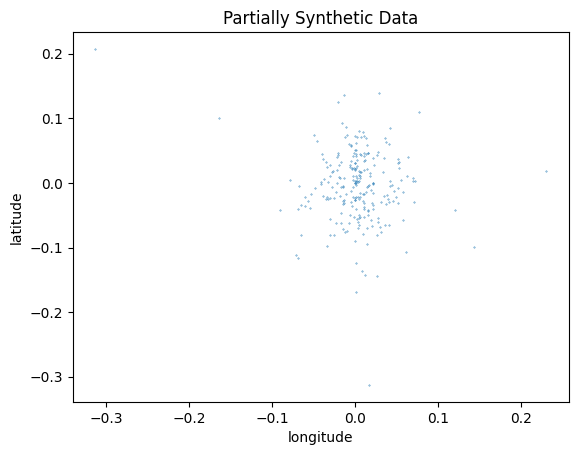

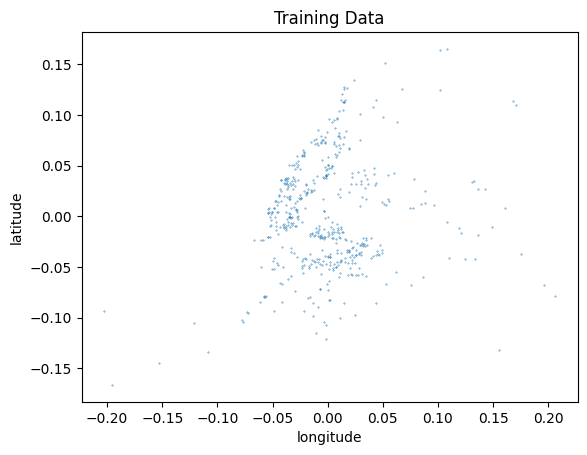

In [100]:
import matplotlib.pyplot as plt
def plot_manhattan(df, title):
    ax = df.plot.scatter(
        x="longitude",
        y="latitude",
        s=0.1,
        alpha=1,
        cmap=plt.colormaps["YlOrRd"],
    )
    # ax.set_aspect(1.3)
    ax.set_title(title)
    # ax.axis("equal")
    # ax.set_xlim(-74.3, -73.7)
    # ax.set_ylim(40.4, 40.95)

syn_df["latitude"] = syn_df["LAT_LONG"].apply(lambda x: float(x.split(",")[0]) if x is not None else None)
syn_df["longitude"] = syn_df["LAT_LONG"].apply(lambda x: float(x.split(",")[1]) if x is not None else None)
plot_manhattan(syn_df, "Partially Synthetic Data")
plot_manhattan(trn_df, "Training Data")

In [101]:
syn_df.latitude.min(), syn_df.latitude.max()

(np.float64(-0.31259), np.float64(0.20736))

In [102]:
trn_df.latitude.min(), trn_df.latitude.max()

(np.float64(-0.16643888066263912), np.float64(0.16534111933735574))

### QUALITY ASSURANCE

#### univariate `age`

In [ ]:
print("Original Age:  " + ", ".join([f'q{q*100:.0f}: {trn_df["age"].quantile(q):.0f}' for q in [.1, .25, .5, .75, .9]]))
print("Synthetic Age: " + ", ".join([f'q{q*100:.0f}: {syn_df["age"].quantile(q):.0f}' for q in [.1, .25, .5, .75, .9]]))
#syn_df["age"].quantile(np.linspace(0, 1, 11))

#### bivariate `sex` ~ `income`: income gap

In [ ]:
trn_gap = (trn_df[trn_df["sex"] == "Male"]["income"] == ">50K").mean() - (trn_df[trn_df["sex"] == "Female"]["income"] == ">50K").mean()
syn_gap = (syn_df[syn_df["sex"] == "Male"]["income"] == ">50K").mean() - (syn_df[syn_df["sex"] == "Female"]["income"] == ">50K").mean()
print(f"Income Gap {trn_gap:.1%} vs. {syn_gap:.1%}")

#### check consistency between `education` and `education.num`

In [ ]:
pd.crosstab(syn_df["education"], syn_df["education_num"])